# Finding the Best Triproute

## Business Problem


### Importing the Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

In [63]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Importing the dataset

In [64]:
data = pd.read_excel("triproute.xls")

In [65]:
data

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.63,00:43:37,30.49,0,22676.00,0,118,184,4,1
1,2,0.28,00:14:10,18.06,0,4000.00,0,60,77,3,1
2,3,0.09,00:02:33,18.09,0,824.00,0,45,19,1,2
3,4,1.02,00:17:20,44.19,0,13515.00,0,108,86,1,0
4,5,0.27,00:10:34,23.78,0,4307.00,13,65,82,3,3
...,...,...,...,...,...,...,...,...,...,...,...
723,724,0.30,00:05:59,24.89,0,4000.00,0,52,29,3,0
724,725,0.17,00:03:49,53.96,0,3747.00,0,72,16,1,0
725,726,1.35,00:31:14,32.83,0,17499.00,0,111,199,10,8
726,727,0.73,00:38:02,13.62,0,8723.00,13,55,161,1,0


In [66]:
data.head()

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.63,00:43:37,30.49,0,22676.00,0,118,184,4,1
1,2,0.28,00:14:10,18.06,0,4000.00,0,60,77,3,1
2,3,0.09,00:02:33,18.09,0,824.00,0,45,19,1,2
3,4,1.02,00:17:20,44.19,0,13515.00,0,108,86,1,0
4,5,0.27,00:10:34,23.78,0,4307.00,13,65,82,3,3


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_id             728 non-null    int64  
 1   fuel_consumption    719 non-null    float64
 2   total_time          728 non-null    object 
 3   average_speed       728 non-null    float64
 4   Crash               728 non-null    int64  
 5   distance_travelled  682 non-null    float64
 6   Alarms              728 non-null    int64  
 7   max_speed           728 non-null    int64  
 8   speedoverlimit      728 non-null    int64  
 9   SuddenDcc           728 non-null    int64  
 10  SuddenAcc           728 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 62.7+ KB


In [68]:
data.shape

(728, 11)

## Data Cleaning

In [69]:
pd.set_option("display.float", "{:.2f}".format)

In [70]:
data.describe()

,Trip_id,fuel_consumption,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
count,728.00,719.00,728.00,728.00,682.00,728.00,728.00,728.00,728.00,728.00
mean,364.50,1.43,33.29,0.00,21624.66,0.98,79.95,90.83,3.45,2.71
std,210.30,2.67,21.23,0.00,39628.48,3.44,41.03,83.44,4.47,4.60
min,1.00,0.00,0.50,0.00,9.00,0.00,8.00,1.00,0.00,0.00
25%,182.75,0.19,18.40,0.00,3000.00,0.00,50.00,34.75,0.00,0.00
50%,364.50,0.52,29.87,0.00,7456.00,0.00,74.00,72.00,2.00,1.00
75%,546.25,1.26,43.10,0.00,19000.00,0.00,114.00,124.25,5.00,3.00
max,728.00,24.90,117.50,0.00,342000.00,13.00,178.00,820.00,41.00,39.00


In [71]:
# Checking for messing values
data.isna().sum()

Trip_id                0
fuel_consumption       9
total_time             0
average_speed          0
Crash                  0
distance_travelled    46
Alarms                 0
max_speed              0
speedoverlimit         0
SuddenDcc              0
SuddenAcc              0
dtype: int64

In [72]:
data.distance_travelled.fillna(0)

0     22676.00
1      4000.00
2       824.00
3     13515.00
4      4307.00
        ...   
723    4000.00
724    3747.00
725   17499.00
726    8723.00
727   12838.00
Name: distance_travelled, Length: 728, dtype: float64

In [73]:
data.isna().sum()

Trip_id                0
fuel_consumption       9
total_time             0
average_speed          0
Crash                  0
distance_travelled    46
Alarms                 0
max_speed              0
speedoverlimit         0
SuddenDcc              0
SuddenAcc              0
dtype: int64

In [74]:
mean_value=data['distance_travelled'].mean()
data['distance_travelled'].fillna(value=mean_value, inplace=True)

In [75]:
data.isnull().sum()

Trip_id               0
fuel_consumption      9
total_time            0
average_speed         0
Crash                 0
distance_travelled    0
Alarms                0
max_speed             0
speedoverlimit        0
SuddenDcc             0
SuddenAcc             0
dtype: int64

In [76]:
data

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.63,00:43:37,30.49,0,22676.00,0,118,184,4,1
1,2,0.28,00:14:10,18.06,0,4000.00,0,60,77,3,1
2,3,0.09,00:02:33,18.09,0,824.00,0,45,19,1,2
3,4,1.02,00:17:20,44.19,0,13515.00,0,108,86,1,0
4,5,0.27,00:10:34,23.78,0,4307.00,13,65,82,3,3
...,...,...,...,...,...,...,...,...,...,...,...
723,724,0.30,00:05:59,24.89,0,4000.00,0,52,29,3,0
724,725,0.17,00:03:49,53.96,0,3747.00,0,72,16,1,0
725,726,1.35,00:31:14,32.83,0,17499.00,0,111,199,10,8
726,727,0.73,00:38:02,13.62,0,8723.00,13,55,161,1,0


In [77]:
data=data.drop(['total_time'], axis=1)

In [78]:
data=data.drop(['Crash'], axis=1)

## Exploratory Data Analysis

In [79]:
data.describe()

,Trip_id,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
count,728.00,719.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00
mean,364.50,1.43,33.29,21624.66,0.98,79.95,90.83,3.45,2.71
std,210.30,2.67,21.23,38354.27,3.44,41.03,83.44,4.47,4.60
min,1.00,0.00,0.50,9.00,0.00,8.00,1.00,0.00,0.00
25%,182.75,0.19,18.40,3000.00,0.00,50.00,34.75,0.00,0.00
50%,364.50,0.52,29.87,9043.50,0.00,74.00,72.00,2.00,1.00
75%,546.25,1.26,43.10,21624.66,0.00,114.00,124.25,5.00,3.00
max,728.00,24.90,117.50,342000.00,13.00,178.00,820.00,41.00,39.00


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_id             728 non-null    int64  
 1   fuel_consumption    719 non-null    float64
 2   average_speed       728 non-null    float64
 3   distance_travelled  728 non-null    float64
 4   Alarms              728 non-null    int64  
 5   max_speed           728 non-null    int64  
 6   speedoverlimit      728 non-null    int64  
 7   SuddenDcc           728 non-null    int64  
 8   SuddenAcc           728 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.3 KB


In [81]:
data


,Trip_id,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.63,30.49,22676.00,0,118,184,4,1
1,2,0.28,18.06,4000.00,0,60,77,3,1
2,3,0.09,18.09,824.00,0,45,19,1,2
3,4,1.02,44.19,13515.00,0,108,86,1,0
4,5,0.27,23.78,4307.00,13,65,82,3,3
...,...,...,...,...,...,...,...,...,...
723,724,0.30,24.89,4000.00,0,52,29,3,0
724,725,0.17,53.96,3747.00,0,72,16,1,0
725,726,1.35,32.83,17499.00,0,111,199,10,8
726,727,0.73,13.62,8723.00,13,55,161,1,0


In [82]:
display(data.head())

,Trip_id,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.63,30.49,22676.00,0,118,184,4,1
1,2,0.28,18.06,4000.00,0,60,77,3,1
2,3,0.09,18.09,824.00,0,45,19,1,2
3,4,1.02,44.19,13515.00,0,108,86,1,0
4,5,0.27,23.78,4307.00,13,65,82,3,3


Text(0, 0.5, 'SuddenAcc')

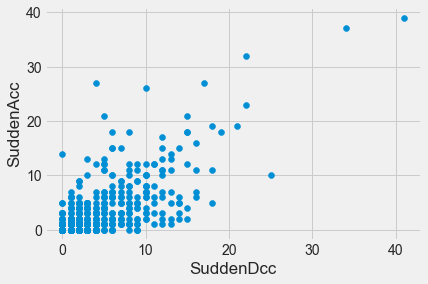

In [83]:
plt.scatter(data['SuddenDcc'], data['SuddenAcc'])
plt.xlabel('SuddenDcc')
plt.ylabel('SuddenAcc')

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\si

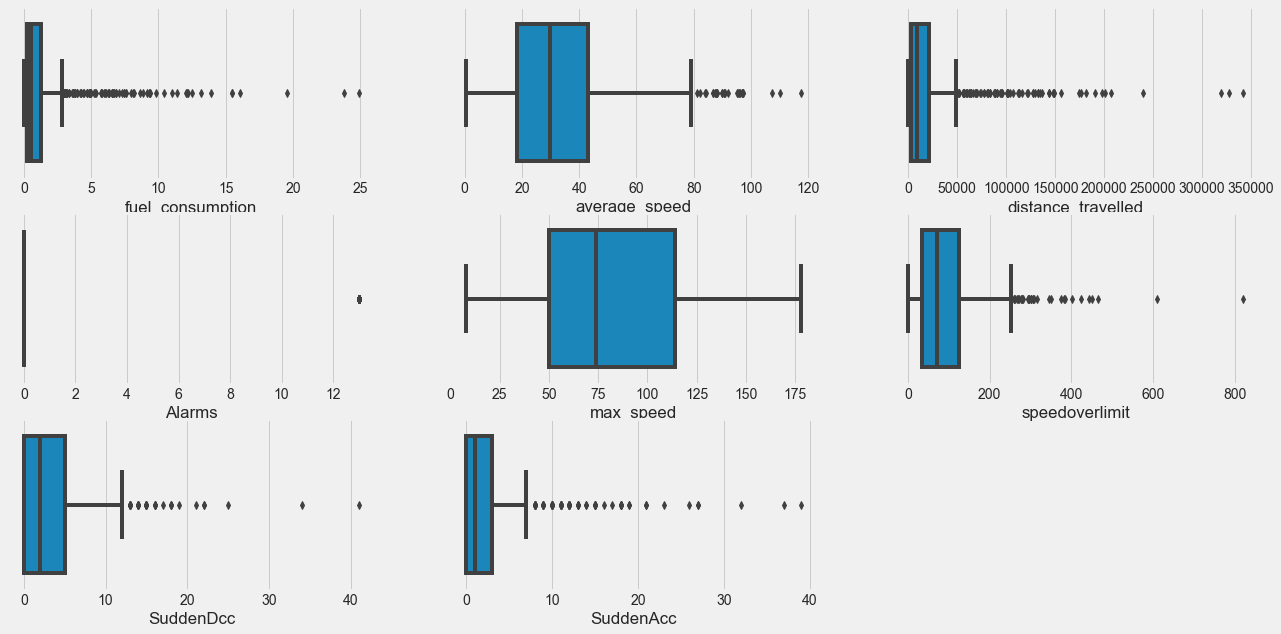

In [84]:
# checking the outliers

plt.figure(figsize = (20,10))

for i in enumerate(data.columns[1:]): # first column is 'country'. So, dropped it.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])

In [85]:
data.describe()

,Trip_id,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
count,728.00,719.00,728.00,728.00,728.00,728.00,728.00,728.00,728.00
mean,364.50,1.43,33.29,21624.66,0.98,79.95,90.83,3.45,2.71
std,210.30,2.67,21.23,38354.27,3.44,41.03,83.44,4.47,4.60
min,1.00,0.00,0.50,9.00,0.00,8.00,1.00,0.00,0.00
25%,182.75,0.19,18.40,3000.00,0.00,50.00,34.75,0.00,0.00
50%,364.50,0.52,29.87,9043.50,0.00,74.00,72.00,2.00,1.00
75%,546.25,1.26,43.10,21624.66,0.00,114.00,124.25,5.00,3.00
max,728.00,24.90,117.50,342000.00,13.00,178.00,820.00,41.00,39.00


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_id             728 non-null    int64  
 1   fuel_consumption    719 non-null    float64
 2   average_speed       728 non-null    float64
 3   distance_travelled  728 non-null    float64
 4   Alarms              728 non-null    int64  
 5   max_speed           728 non-null    int64  
 6   speedoverlimit      728 non-null    int64  
 7   SuddenDcc           728 non-null    int64  
 8   SuddenAcc           728 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.3 KB


In [87]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.reset_index()

In [88]:
np.any(np.isnan(data))

False

In [ ]:
## Data Preprocessing 

In [89]:
from sklearn.preprocessing import StandardScaler
# instantiate 
scaler = StandardScaler()

# fit_transform
scaled_data = pd.DataFrame(scaler.fit_transform(data))


scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.73,-1.73,0.08,-0.15,0.03,-0.29,0.92,1.11,0.11,-0.38
1,-1.72,-1.72,-0.43,-0.74,-0.46,-0.29,-0.52,-0.18,-0.11,-0.38
2,-1.72,-1.72,-0.50,-0.74,-0.54,-0.29,-0.89,-0.88,-0.56,-0.16
3,-1.71,-1.71,-0.15,0.50,-0.21,-0.29,0.67,-0.07,-0.56,-0.59
4,-1.71,-1.71,-0.43,-0.47,-0.45,3.47,-0.39,-0.12,-0.11,0.06


(10.5, -0.5)

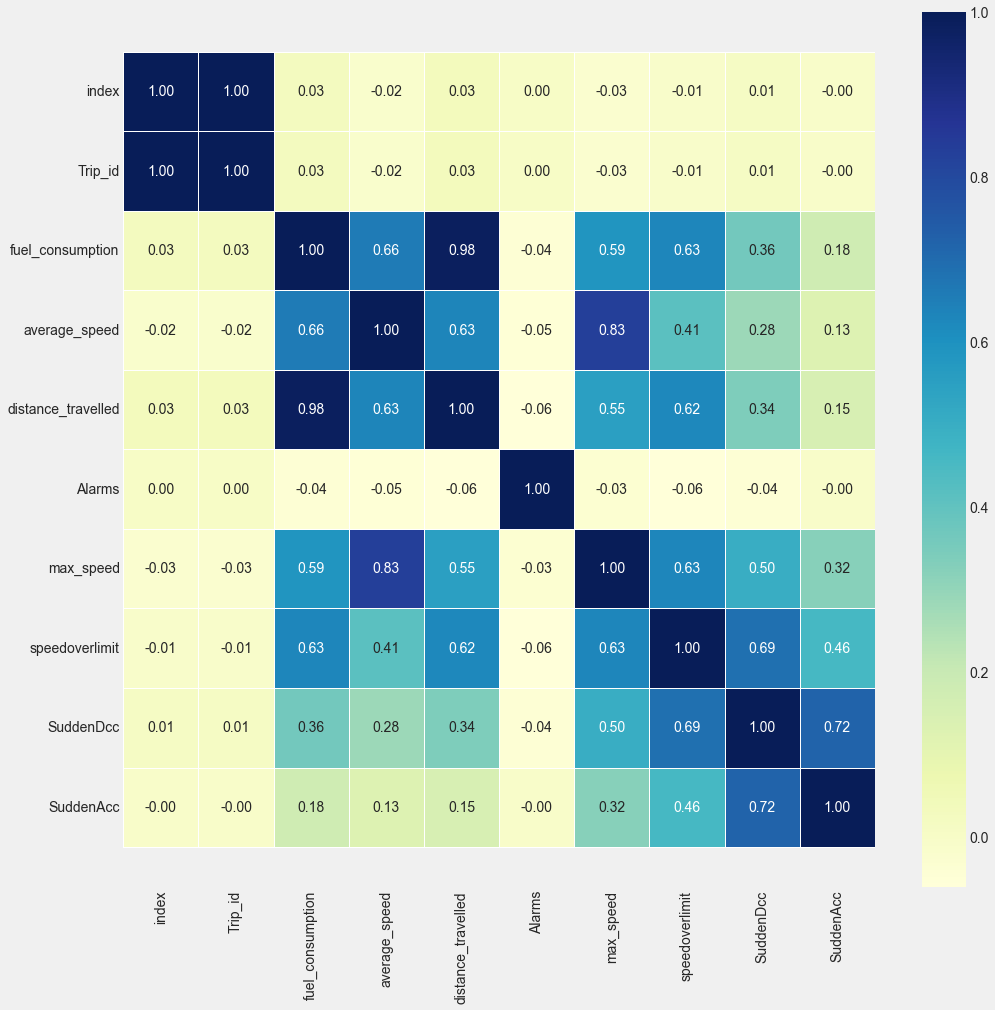

In [90]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [91]:
data['Alarms'].value_counts()[13]

55

In [92]:
data['Alarms'].replace(13,1)

0      0
1      0
2      0
3      0
4      1
      ..
714    0
715    0
716    0
717    1
718    0
Name: Alarms, Length: 719, dtype: int64

## Building Models

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [94]:
from sklearn.model_selection import train_test_split

X = data.drop('Alarms', axis=1)
y = data.Alarms

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
## I am considering an Alarms as an target variable

## Logistics Regression

In [95]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.04%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.93  0.00      0.93       0.47          0.87
recall      1.00  0.00      0.93       0.50          0.93
f1-score    0.96  0.00      0.93       0.48          0.90
support   468.00 35.00      0.93     503.00        503.00
_______________________________________________
Confusion Matrix: 
 [[468   0]
 [ 35   0]]

Test Result:
Accuracy Score: 90.74%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.91  0.00      0.91       0.45          0.82
recall      1.00  0.00      0.91       0.50          0.91
f1-score    0.95  0.00      0.91       0.48          0.86
support   196.00 20.00      0.91     216.00        216.00
_______________________________________________
Confusion Matrix: 
 [[196   0]
 [ 20   0]]



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metr

In [96]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,93.04,90.74


## K-nearest neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.84%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.93  0.00      0.93       0.47          0.87
recall      1.00  0.00      0.93       0.50          0.93
f1-score    0.96  0.00      0.93       0.48          0.90
support   468.00 35.00      0.93     503.00        503.00
_______________________________________________
Confusion Matrix: 
 [[467   1]
 [ 35   0]]

Test Result:
Accuracy Score: 90.28%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.91  0.00      0.90       0.45          0.82
recall      0.99  0.00      0.90       0.50          0.90
f1-score    0.95  0.00      0.90       0.47          0.86
support   196.00 20.00      0.90     216.00        216.00
_______________________________________________
Confusion Matrix: 
 [[195   1]
 [ 20   0]]



In [98]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,93.04,90.74
1,K-nearest neighbors,92.84,90.28


## Support Vector machine

In [99]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   1.00  1.00      1.00       1.00          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  1.00      1.00       1.00          1.00
support   468.00 35.00      1.00     503.00        503.00
_______________________________________________
Confusion Matrix: 
 [[468   0]
 [  0  35]]

Test Result:
Accuracy Score: 90.74%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.91  0.00      0.91       0.45          0.82
recall      1.00  0.00      0.91       0.50          0.91
f1-score    0.95  0.00      0.91       0.48          0.86
support   196.00 20.00      0.91     216.00        216.00
_______________________________________________
Confusion Matrix: 
 [[196   0]
 [ 20   0]]



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,93.04,90.74
1,K-nearest neighbors,92.84,90.28
2,Support Vector Machine,100.00,90.74


## Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   1.00  1.00      1.00       1.00          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  1.00      1.00       1.00          1.00
support   468.00 35.00      1.00     503.00        503.00
_______________________________________________
Confusion Matrix: 
 [[468   0]
 [  0  35]]

Test Result:
Accuracy Score: 83.80%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.90  0.06      0.84       0.48          0.83
recall      0.92  0.05      0.84       0.48          0.84
f1-score    0.91  0.05      0.84       0.48          0.83
support   196.00 20.00      0.84     216.00        216.00
_______________________________________________
Confusion Matrix: 
 [[180  16]
 [ 19   1]]



In [102]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,93.04,90.74
1,K-nearest neighbors,92.84,90.28
2,Support Vector Machine,100.00,90.74
3,Decision Tree Classifier,100.00,83.80


## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   1.00  1.00      1.00       1.00          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  1.00      1.00       1.00          1.00
support   468.00 35.00      1.00     503.00        503.00
_______________________________________________
Confusion Matrix: 
 [[468   0]
 [  0  35]]

Test Result:
Accuracy Score: 90.74%
_______________________________________________
CLASSIFICATION REPORT:
               0    13  accuracy  macro avg  weighted avg
precision   0.91  0.00      0.91       0.45          0.82
recall      1.00  0.00      0.91       0.50          0.91
f1-score    0.95  0.00      0.91       0.48          0.86
support   196.00 20.00      0.91     216.00        216.00
_______________________________________________
Confusion Matrix: 
 [[196   0]
 [ 20   0]]



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,93.04,90.74
1,K-nearest neighbors,92.84,90.28
2,Support Vector Machine,100.00,90.74
3,Decision Tree Classifier,100.00,83.80
4,Random Forest Classifier,100.00,90.74


## Conclusion and inferences